In [2]:

import numpy as np 
import pandas as pd
import seaborn as sns 
import warnings 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform
warnings.filterwarnings('ignore')


In [4]:
#df=pd.read_csv("diabetes.csv")
#df = pd.read_excel('Book1.xlsx')
df = pd.read_excel('filtered_blood_sugar_data - Copy - Copy.xlsx')
#df['GENDER'] = df['GENDER'].astype('int64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AGE             1888 non-null   int64
 1   GENDER          1888 non-null   int64
 2   BLOOD PRESSURE  1888 non-null   int64
 3   BLOOD SUGAR     1888 non-null   int64
 4   PID FUN         1888 non-null   int64
 5   CLASS ID        1888 non-null   int64
dtypes: int64(6)
memory usage: 88.6 KB


In [6]:
df.describe()

,AGE,GENDER,BLOOD PRESSURE,BLOOD SUGAR,PID FUN,CLASS ID
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,46.407309,0.317797,90.440148,167.346398,0.148835,0.599047
std,16.033414,0.465743,29.667270,83.458539,0.356020,0.490221
min,21.000000,0.000000,24.000000,24.000000,0.000000,0.000000
25%,32.000000,0.000000,74.000000,114.000000,0.000000,0.000000
50%,46.000000,0.000000,90.000000,144.000000,0.000000,1.000000
75%,60.000000,1.000000,104.000000,199.000000,0.000000,1.000000
max,93.000000,1.000000,1034.000000,1101.000000,1.000000,1.000000


In [7]:
#print(df[df['Pregnancies']==0].shape[0])
#print(df[df['Glucose']==0].shape[0])
#print(df[df['BloodPressure']==0].shape[0])
#print(df[df['SkinThickness']==0].shape[0])
#print(df[df['Insulin']==0].shape[0])
#print(df[df['BMI']==0].shape[0])
#print(df[df['DiabetesPedigreeFunction']==0].shape[0])
#print(df[df['Age']==0].shape[0])

In [8]:
#df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
#df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
#df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
#df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
#df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
#df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

df.describe()


,AGE,GENDER,BLOOD PRESSURE,BLOOD SUGAR,PID FUN,CLASS ID
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,46.407309,0.317797,90.440148,167.346398,0.148835,0.599047
std,16.033414,0.465743,29.667270,83.458539,0.356020,0.490221
min,21.000000,0.000000,24.000000,24.000000,0.000000,0.000000
25%,32.000000,0.000000,74.000000,114.000000,0.000000,0.000000
50%,46.000000,0.000000,90.000000,144.000000,0.000000,1.000000
75%,60.000000,1.000000,104.000000,199.000000,0.000000,1.000000
max,93.000000,1.000000,1034.000000,1101.000000,1.000000,1.000000


In [9]:
X=df.drop('CLASS ID',axis=1)
y=df['CLASS ID']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f" KNN Classifier Accuracy: {accuracy:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm)

 KNN Classifier Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       148
           1       0.86      0.85      0.85       230

    accuracy                           0.82       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.82      0.82      0.82       378

Confusion Matrix:
[[115  33]
 [ 35 195]]


In [13]:
# SVM Classifier
svm = SVC(kernel='linear')  # You can try 'rbf' or 'poly' for different results
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f" SVM Accuracy: {accuracy:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)

 SVM Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       148
           1       0.93      0.87      0.90       230

    accuracy                           0.88       378
   macro avg       0.87      0.88      0.88       378
weighted avg       0.88      0.88      0.88       378

Confusion Matrix:
[[132  16]
 [ 29 201]]


In [14]:
# logistic regression Classifier
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" logistic regression Accuracy: {accuracy:.2f}")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


 logistic regression Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       148
           1       0.92      0.88      0.90       230

    accuracy                           0.88       378
   macro avg       0.87      0.88      0.88       378
weighted avg       0.88      0.88      0.88       378

Confusion Matrix:
[[131  17]
 [ 28 202]]


In [15]:
# Naive Bayes classifier
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Classifier Accuracy: {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classifier Accuracy: 0.7434

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       148
           1       0.81      0.75      0.78       230

    accuracy                           0.74       378
   macro avg       0.73      0.74      0.74       378
weighted avg       0.75      0.74      0.75       378


Confusion Matrix:
[[108  40]
 [ 57 173]]


In [32]:
#   Naive Bayes (GaussianNB) classifierhyperparameter tuning using RandomizedSearchCV.
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the parameter grid to search over
param_dist = {
    'var_smoothing': uniform(1e-9, 1e-3)  # Smoothing parameter for GaussianNB
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=nb_classifier, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5, 
                                   random_state=42, 
                                   verbose=2, 
                                   n_jobs=-1)

# Fit the RandomizedSearchCV model to find the best parameters
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_nb_model = random_search.best_estimator_

# Predict on the test set
y_pred_nb = best_nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Classifier Accuracy (with RandomizedSearchCV): {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Display best parameters found by RandomizedSearchCV
print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Naive Bayes Classifier Accuracy (with RandomizedSearchCV): 0.7434

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       159
           1       0.80      0.75      0.77       219

    accuracy                           0.74       378
   macro avg       0.74      0.74      0.74       378
weighted avg       0.75      0.74      0.74       378


Confusion Matrix:
[[117  42]
 [ 55 164]]

Best Parameters from RandomizedSearchCV:
{'var_smoothing': 0.0003745411188473625}


In [33]:
# hyperparameter tuning for Gaussian Naive Bayes using GridSearchCV
# Initialize the Naive Bayes model
nb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Small smoothing values to add variance
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model after tuning
best_nb = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian Naive Bayes Classifier Accuracy (with hyperparameter tuning): {accuracy:.4f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Gaussian Naive Bayes Classifier Accuracy (with hyperparameter tuning): 0.7434

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       159
           1       0.80      0.75      0.77       219

    accuracy                           0.74       378
   macro avg       0.74      0.74      0.74       378
weighted avg       0.75      0.74      0.74       378


Confusion Matrix:
[[117  42]
 [ 55 164]]


In [34]:
# Naive Bayes classifier with cross validation
# Initialize the Naive Bayes classifier with cross validation
nb_classifier = GaussianNB()

# Cross-validation using StratifiedKFold to ensure balanced class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation on the training data
cross_val_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-validation Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {np.std(cross_val_scores):.4f}")

# Train the model on the entire training set
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Classifier Accuracy on Test Set: {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Cross-validation Accuracy Scores: [0.71854305 0.75827815 0.7384106  0.7218543  0.73178808]
Mean Cross-validation Accuracy: 0.7338
Standard Deviation of Cross-validation Accuracy: 0.0141
Naive Bayes Classifier Accuracy on Test Set: 0.7434

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       159
           1       0.80      0.75      0.77       219

    accuracy                           0.74       378
   macro avg       0.74      0.74      0.74       378
weighted avg       0.75      0.74      0.74       378


Confusion Matrix:
[[117  42]
 [ 55 164]]


In [35]:
# svm with hyperparameter tunning
# Create the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01],  # Kernel coefficient
    'degree': [3, 4, 5]  # Degree for 'poly' kernel (only relevant for poly kernel)
}

# Initialize the SVM model
svm = SVC()

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Get the best estimator
best_svm = grid_search.best_estimator_

# Make predictions with the best model
y_pred_svm = best_svm.predict(X_test)

# Evaluate the model (e.g., accuracy, confusion matrix)
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best score found:  0.8172185430463577
Accuracy: 0.843915343915344
Confusion Matrix:
 [[140  19]
 [ 40 179]]


In [37]:
# Decision Tree classifier
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.7143

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67       159
           1       0.76      0.74      0.75       219

    accuracy                           0.71       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.72      0.71      0.72       378


Confusion Matrix:
 [[109  50]
 [ 58 161]]


In [38]:
# Decision Tree model with hyperparameter tuning
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Define parameter grid for hyperparameter tuning
param_dist_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=param_dist_dt,
    n_iter=50,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the model with hyperparameter tuning
random_search_dt.fit(X_train, y_train)

# Get best model and make predictions
best_dt_model = random_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy (Tuned): {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Best parameters
print("\nBest Parameters for Decision Tree:")
print(random_search_dt.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Decision Tree Classifier Accuracy (Tuned): 0.7963

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       159
           1       0.85      0.79      0.82       219

    accuracy                           0.80       378
   macro avg       0.79      0.80      0.79       378
weighted avg       0.80      0.80      0.80       378


Confusion Matrix:
 [[128  31]
 [ 46 173]]

Best Parameters for Decision Tree:
{'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini'}


In [39]:
# Random Forest classifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation using StratifiedKFold to ensure balanced class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation on the training data
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-validation Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation of Cross-validation Accuracy: {np.std(cross_val_scores):.4f}")

# Train the model on the entire training set
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy on Test Set: {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Cross-validation Accuracy Scores: [0.79801325 0.83774834 0.77483444 0.8013245  0.78476821]
Mean Cross-validation Accuracy: 0.7993
Standard Deviation of Cross-validation Accuracy: 0.0214
Random Forest Classifier Accuracy on Test Set: 0.8148

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       159
           1       0.86      0.82      0.84       219

    accuracy                           0.81       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.82      0.81      0.82       378


Confusion Matrix:
[[129  30]
 [ 40 179]]


In [40]:
# random Forest Classifier with hyperparameters tunned using gridsearchcv
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],                # Number of trees
    'max_depth': [None, 10, 20, 30],                # Max depth of trees
    'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples at leaf nodes
    'max_features': ['auto', 'sqrt', 'log2'],      # Features to consider for splitting
    'bootstrap': [True, False]                      # Whether to use bootstrap samples
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy:.4f}")


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with Best Hyperparameters: 0.8571


In [41]:
# Random Forest Classifier using randomisedsearchcv
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define parameter distribution for tuning
param_dist = {
    'n_estimators': randint(50, 200),           # Number of trees (randomized between 50 and 200)
    'max_depth': [None, 10, 20, 30, 40, 50],     # Max depth of trees
    'min_samples_split': randint(2, 11),         # Min samples to split a node
    'min_samples_leaf': randint(1, 11),          # Min samples at leaf nodes
    'max_features': ['auto', 'sqrt', 'log2'],    # Features to consider for splitting
    'bootstrap': [True, False]                   # Whether to use bootstrap samples
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, 
                                   n_jobs=-1, scoring='accuracy')

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_params_random = random_search.best_params_
print(f"Best Hyperparameters from RandomizedSearchCV: {best_params_random}")

# Get the best model
best_rf_model_random = random_search.best_estimator_

# Predict using the best model
y_pred_random = best_rf_model_random.predict(X_test)

# Evaluate the model
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy with Best Hyperparameters from RandomizedSearchCV: {accuracy_random:.4f}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters from RandomizedSearchCV: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 76}
Accuracy with Best Hyperparameters from RandomizedSearchCV: 0.8439


In [42]:
# XGBoost Classifier
# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy:.4f}")

# Print detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

XGBoost Classifier Accuracy: 0.8228

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       159
           1       0.86      0.83      0.84       219

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378


Confusion Matrix:
[[129  30]
 [ 37 182]]


In [32]:
# xgboost and naive bayes classifier using voting classifier
# Initialize the models
nb_classifier = GaussianNB()
xgb_classifier = xgb.XGBClassifier()

# Create a voting classifier combining XGBoost and Naive Bayes
voting_clf = VotingClassifier(estimators=[('naive_bayes', nb_classifier), ('xgboost', xgb_classifier)], voting='hard')

# Train the combined model
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

# Display classification report and confusion matrix
print("\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred))

print("\nVoting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier Accuracy: 0.2908

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        49
           1       1.00      0.05      0.10       147

    accuracy                           0.29       196
   macro avg       0.63      0.53      0.26       196
weighted avg       0.82      0.29      0.18       196


Voting Classifier Confusion Matrix:
[[ 49   0]
 [139   8]]


In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hyperparameter tuning for Naive Bayes (if needed)
nb_classifier = GaussianNB()

# Hyperparameter tuning for XGBoost
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Create base learners using Naive Bayes and XGBoost
base_learners = [
    ('naive_bayes', nb_classifier),
    ('xgboost', best_xgb)
]

# Meta-model (Logistic Regression) to combine the predictions from Naive Bayes and XGBoost
meta_model = LogisticRegression()

# Stacking Classifier that combines the predictions from Naive Bayes and XGBoost using the meta-model
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stacked = stacked_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_stacked)
print(f"Stacked Model Accuracy: {accuracy:.4f}")

# Display classification report and confusion matrix
print("\nStacked Model Classification Report:")
print(classification_report(y_test, y_pred_stacked))

print("\nStacked Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacked))


Stacked Model Accuracy: 0.8673

Stacked Model Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        49
           1       0.91      0.91      0.91       147

    accuracy                           0.87       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.87      0.87      0.87       196


Stacked Model Confusion Matrix:
[[ 36  13]
 [ 13 134]]


In [34]:
# xgboost and naive bayes  (stacking classifier) 
# Initialize base models for Stacking
nb_classifier = GaussianNB()
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize final estimator (logistic regression in this case)
final_estimator = LogisticRegression()

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('naive_bayes', nb_classifier), ('xgboost', xgb_classifier)], 
    final_estimator=final_estimator
)

# Train the model
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy (without hyperparameter tuning): {accuracy:.4f}")

# Display classification report and confusion matrix
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_pred))

print("\nStacking Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Stacking Classifier Accuracy (without hyperparameter tuning): 0.8163

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        49
           1       0.88      0.88      0.88       147

    accuracy                           0.82       196
   macro avg       0.76      0.76      0.76       196
weighted avg       0.82      0.82      0.82       196


Stacking Classifier Confusion Matrix:
[[ 31  18]
 [ 18 129]]


In [35]:
# xgboost and naive bayes  hyperparameter tunned (stacking classifier) 
# Initialize base models for Stacking
nb_classifier = GaussianNB()
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter tuning for Naive Bayes
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
nb_grid_search = GridSearchCV(nb_classifier, nb_param_grid, cv=5, n_jobs=-1, verbose=1)
nb_best_model = nb_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 0.9, 1.0]
}
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_best_model = xgb_grid_search.fit(X_train, y_train)

# Initialize final estimator (logistic regression in this case)
final_estimator = LogisticRegression()

# Create the Stacking Classifier with best models
stacking_clf = StackingClassifier(
    estimators=[('naive_bayes', nb_best_model.best_estimator_), ('xgboost', xgb_best_model.best_estimator_)],
    final_estimator=final_estimator
)

# Train the model
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy (with hyperparameter tuning): {accuracy:.4f}")

# Display classification report and confusion matrix
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_pred))

print("\nStacking Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Stacking Classifier Accuracy (with hyperparameter tuning): 0.8673

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        49
           1       0.91      0.91      0.91       147

    accuracy                           0.87       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.87      0.87      0.87       196


Stacking Classifier Confusion Matrix:
[[ 36  13]
 [ 13 134]]


In [36]:
# Adaboost classifier
# intializing the adaboost classifier
ada_model = AdaBoostClassifier(random_state=42)

# Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

AdaBoost Classifier Accuracy: 0.8724

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.92      0.91      0.91       147

    accuracy                           0.87       196
   macro avg       0.83      0.83      0.83       196
weighted avg       0.87      0.87      0.87       196


Confusion Matrix:
[[ 37  12]
 [ 13 134]]


In [57]:
# Voting Classifier with AdaBoost and Naive Bayes
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Load dataset and prepare features (X) and target (y)
# Assuming X_train, y_train, X_test, y_test are pre-defined

# Define AdaBoost and Naive Bayes classifiers
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
nb_classifier = GaussianNB()

# Combine AdaBoost and Naive Bayes in a VotingClassifier
voting_clf = VotingClassifier(estimators=[('adaboost', adaboost), ('naive_bayes', nb_classifier)], voting='soft')

# Define hyperparameters to tune using RandomizedSearchCV
param_dist = {
    'adaboost__n_estimators': [50, 100, 150],
    'adaboost__learning_rate': [0.01, 0.1, 0.5],
    'naive_bayes__var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(voting_clf, param_dist, cv=5, scoring='accuracy', n_iter=10)

# Fit the model with training data
random_search.fit(X_train, y_train)

# Best estimator
best_voting_clf = random_search.best_estimator_

# Predict using the best model
y_pred = best_voting_clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.3010

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.96      0.41        49
           1       0.86      0.08      0.15       147

    accuracy                           0.30       196
   macro avg       0.56      0.52      0.28       196
weighted avg       0.71      0.30      0.21       196


Confusion Matrix:
[[ 47   2]
 [135  12]]


In [58]:
#Stacking Classifier for AdaBoost and Naive Bayes
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define base models (AdaBoost and Naive Bayes)
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
nb_classifier = GaussianNB()

# Define meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Create Stacking Classifier
stacked_model = StackingClassifier(estimators=[('adaboost', adaboost), ('naive_bayes', nb_classifier)], final_estimator=meta_model)

# Define hyperparameters to tune
param_dist = {
    'adaboost__n_estimators': [50, 100],
    'adaboost__learning_rate': [0.01, 0.1],
    'naive_bayes__var_smoothing': [1e-9, 1e-8],
    'final_estimator__C': [0.1, 1, 10]
}

# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(stacked_model, param_dist, cv=5, scoring='accuracy', n_iter=10)

# Fit the model with training data
random_search.fit(X_train, y_train)

# Best estimator
best_stacked_model = random_search.best_estimator_

# Predict using the best model
y_pred = best_stacked_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8724

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.92      0.91      0.91       147

    accuracy                           0.87       196
   macro avg       0.83      0.83      0.83       196
weighted avg       0.87      0.87      0.87       196


Confusion Matrix:
[[ 37  12]
 [ 13 134]]


In [37]:
# LightGBM classifier
# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier()

# Train the model
lgbm.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Classifier Accuracy: {accuracy_lgbm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 536, number of negative: 246
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 782, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685422 -> initscore=0.778803
[LightGBM] [Info] Start training from score 0.778803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [38]:
# LightGBM model for hyperparameter tuning
# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier()

# Define parameter grid for hyperparameter tuning
param_dist_lgbm = {
    'num_leaves': [20, 30, 40, 50, 60],
    'max_depth': [-1, 5, 10, 15, 20],
    'learning_rate': [0.1, 0.05, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=50,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the model with hyperparameter tuning
random_search_lgbm.fit(X_train, y_train)

# Get best model and make predictions
best_lgbm_model = random_search_lgbm.best_estimator_
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Classifier Accuracy (Tuned): {accuracy_lgbm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

# Best parameters
print("\nBest Parameters for LightGBM:")
print(random_search_lgbm.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 536, number of negative: 246
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 782, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685422 -> initscore=0.778803
[LightGBM] [Info] Start training from score 0.778803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [39]:
# adaboost and xgbbost combination
# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Hyperparameter tuning for XGBoost
xgb_params = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [100, 200]}
xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Combine Random Forest and XGBoost using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft'  # Use 'soft' voting, which uses the predicted probabilities for voting
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the ensemble model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier (Random Forest + XGBoost) Accuracy: {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier (Random Forest + XGBoost) Accuracy: 0.8622

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        49
           1       0.91      0.91      0.91       147

    accuracy                           0.86       196
   macro avg       0.82      0.81      0.82       196
weighted avg       0.86      0.86      0.86       196


Confusion Matrix:
[[ 35  14]
 [ 13 134]]


In [40]:
# Initialize AdaBoost and XGBoost classifiers
ada_boost = AdaBoostClassifier()
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter tuning for AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}
ada_grid_search = GridSearchCV(ada_boost, ada_param_grid, cv=5, n_jobs=-1, verbose=1)
ada_best_model = ada_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 0.9, 1.0]
}
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_best_model = xgb_grid_search.fit(X_train, y_train)

# Initialize final estimator (logistic regression in this case)
final_estimator = LogisticRegression()

# Create the Stacking Classifier with the best models from GridSearchCV
stacking_clf = StackingClassifier(
    estimators=[('adaboost', ada_best_model.best_estimator_), ('xgboost', xgb_best_model.best_estimator_)],
    final_estimator=final_estimator
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy (with hyperparameter tuning for AdaBoost and XGBoost): {accuracy:.4f}")

# Display classification report and confusion matrix
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_pred))

print("\nStacking Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Stacking Classifier Accuracy (with hyperparameter tuning for AdaBoost and XGBoost): 0.8724

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.92      0.91      0.91       147

    accuracy                           0.87       196
   macro avg       0.83      0.83      0.83       196
weighted avg       0.87      0.87      0.87       196


Stacking Classifier Confusion Matrix:
[[ 37  12]
 [ 13 134]]


In [41]:
# AdaBoost classifier with hyperparameter tunning
# Initialize the AdaBoost classifier
ada_model = AdaBoostClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],       # Learning rate for AdaBoost
    'algorithm': ['SAMME', 'SAMME.R']        # Different boosting algorithms
}

# Initialize GridSearchCV with the AdaBoost model and parameter grid
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model after hyperparameter tuning
best_ada_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_ada_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best AdaBoost Classifier Accuracy: {accuracy:.4f}")
print("Best Hyperparameters:", grid_search.best_params_)

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best AdaBoost Classifier Accuracy: 0.8724
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 150}

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.92      0.91      0.91       147

    accuracy                           0.87       196
   macro avg       0.83      0.83      0.83       196
weighted avg       0.87      0.87      0.87       196


Confusion Matrix:
[[ 37  12]
 [ 13 134]]


In [42]:
# combining both logistic regression and svm 
# Initialize the base models
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)  # Set probability=True for VotingClassifier compatibility

# Create a Voting Classifier with Logistic Regression and SVM
voting_clf = VotingClassifier(
    estimators=[('Logistic Regression', log_reg), ('SVM', svm)],
    voting='soft'  # 'soft' voting uses predicted probabilities, 'hard' uses majority voting
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

# Print detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier Accuracy: 0.8520

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        49
           1       0.92      0.88      0.90       147

    accuracy                           0.85       196
   macro avg       0.80      0.82      0.81       196
weighted avg       0.86      0.85      0.85       196


Confusion Matrix:
[[ 37  12]
 [ 17 130]]


In [43]:
# combining teh svm,logistic regression and knn 
# Initialize the base classifiers
svm_clf = SVC(kernel='linear', probability=True)  # Set probability=True for soft voting
knn_clf = KNeighborsClassifier(n_neighbors=5)
log_reg_clf = LogisticRegression(solver='liblinear')

# Combine the models using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('svm', svm_clf), ('knn', knn_clf), ('log_reg', log_reg_clf)],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted average of probabilities
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the ensemble model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier Accuracy: 0.8520

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        49
           1       0.92      0.88      0.90       147

    accuracy                           0.85       196
   macro avg       0.80      0.82      0.81       196
weighted avg       0.86      0.85      0.85       196


Confusion Matrix:
[[ 37  12]
 [ 17 130]]


In [44]:
# combining the svm,logistic regression and knn with Hyperparameter tuning 
# Hyperparameter tuning for SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Hyperparameter tuning for Logistic Regression
log_reg_params = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=500), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Combine the tuned models using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('svm', best_svm), ('knn', best_knn), ('log_reg', best_log_reg)],
    voting='soft'  # 'soft' uses predicted probabilities for voting
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the ensemble model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy with Hyperparameter Tuning: {accuracy:.4f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier Accuracy with Hyperparameter Tuning: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        49
           1       0.91      0.90      0.90       147

    accuracy                           0.86       196
   macro avg       0.81      0.82      0.81       196
weighted avg       0.86      0.86      0.86       196


Confusion Matrix:
[[ 36  13]
 [ 15 132]]


In [48]:
# stacking ensemble combines KNN, SVM, Logistic Regression, Random Forest, and XGBoost with a meta-learner:
# Define base models
base_models = [
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True, kernel='linear')),
    ('log_reg', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta-learner
meta_learner = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Stacking Ensemble Accuracy: 0.8418

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69        49
           1       0.90      0.89      0.89       147

    accuracy                           0.84       196
   macro avg       0.79      0.79      0.79       196
weighted avg       0.84      0.84      0.84       196



In [49]:
# stacking ensemble combines KNN, SVM, Logistic Regression, Random Forest, and XGBoost with a meta-learner with hyperparameter tunning
# Define hyperparameters for each model
knn_params = {'n_neighbors': [3, 5, 7]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
xgb_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
logreg_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}

# Tune each base model using GridSearchCV
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5).fit(X_train, y_train).best_estimator_
svm = GridSearchCV(SVC(probability=True), svm_params, cv=5).fit(X_train, y_train).best_estimator_
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5).fit(X_train, y_train).best_estimator_
xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5).fit(X_train, y_train).best_estimator_
logreg = GridSearchCV(LogisticRegression(), logreg_params, cv=5).fit(X_train, y_train).best_estimator_

# Define the meta-learner and tune it as well
meta_learner_params = {'C': [0.1, 1, 10]}
meta_learner = GridSearchCV(LogisticRegression(), meta_learner_params, cv=5).fit(X_train, y_train).best_estimator_

# Create the stacking ensemble with tuned models, including Logistic Regression as a base model
stacking_clf = StackingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('rf', rf), ('xgb', xgb), ('logreg', logreg)],
    final_estimator=meta_learner,
    cv=5
)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Stacking Ensemble Accuracy: {accuracy:.4f}")

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Tuned Stacking Ensemble Accuracy: 0.8724

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.92      0.91      0.91       147

    accuracy                           0.87       196
   macro avg       0.83      0.83      0.83       196
weighted avg       0.87      0.87      0.87       196



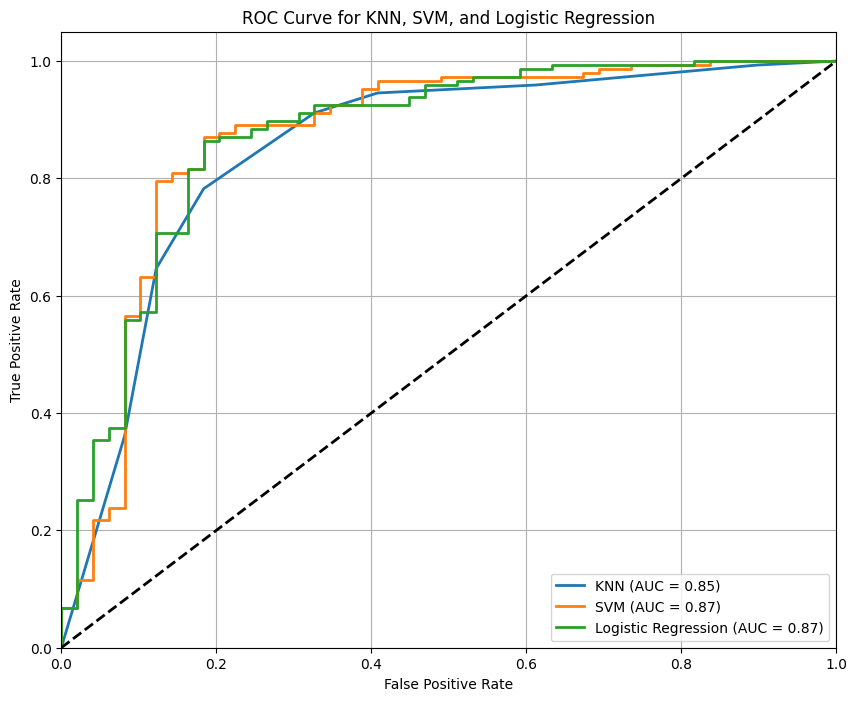

In [47]:
# ROC curve 

def plot_roc_curve(y_true, X_test, model, model_name):
    # Check if model has predict_proba or decision_function for ROC
    if hasattr(model, "predict_proba"):  # Use `predict_proba` if available
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  # Use `decision_function` for models like SVM
        y_score = model.decision_function(X_test)
    else:
        print(f"{model_name} does not support ROC plot as it lacks probability predictions.")
        return
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', lw=2)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot ROC for each model using y_test as ground truth
plot_roc_curve(y_test, X_test, knn, "KNN")
plot_roc_curve(y_test, X_test, svm, "SVM")
plot_roc_curve(y_test, X_test, model, "Logistic Regression")

# Add plot labels and legend
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN, SVM, and Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
